# Collecting subreddit interface language
Collect top posts (maybe just stickied and moderator posts) for a month 
Collect all guidelines, and public discription
Save this in a new csv for each subreddit

In [1]:
%load_ext dotenv
%dotenv

import numpy as np
import csv as csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import math
import json
from datetime import datetime
import seaborn as sns

from nltk import pos_tag
from nltk.util import pad_sequence
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from termcolor import colored

import praw
import requests
import json
import os
import glob
import calendar

client_id = os.environ.get("client_id")
client_secret = os.environ.get("client_secret")
user_agent = os.environ.get("user_agent")

reddit = praw.Reddit(client_id=client_id,
                     client_secret=client_secret,
                     user_agent=user_agent)

EXPORTING = True

# Cleaning subreddits
Super short, but helpful

In [29]:
# Build full description of each sub
tested_subs = list(df_top_posts.subreddit_id.unique())
rows = []
for s in tested_subs:
    sub = get_subreddit(s)
    rows.append({'subreddit': s , 'descr':sub.description, 'public_descr':sub.public_description, 'subreddit_name':sub.display_name, 'submit_text':sub.submit_text})

df_sub = pd.DataFrame(rows)
df_sub['full_descr'] = df_sub['descr'] + df_sub['public_descr']
df_sub = df_sub.set_index('subreddit')

df_sub = df_sub.fillna(' ')

In [ ]:
if EXPORTING:
    df_sub.to_csv('../data/cleaned/subbreddits.csv')

# Cleaning top posts
Super short, but helpful

In [49]:
def get_subreddit(sub_id):
    return list(reddit.info([sub_id]))[0]

def drop_below_word_threshold(df, text_col, threshold):
    df['word_count'] = df[text_col].fillna(' ').apply(lambda x: len(word_tokenize(x)))
    return df[df['word_count'] >= threshold]

In [53]:
# get top posts 
df_top_posts = pd.read_csv('../test_top_posts.csv')
df_top_posts = df_top_posts[df_top_posts['subreddit_id'] != 'subreddit_id'] # this gets rid of a extra header


# drop duplicate posts
df_top_posts = df_top_posts.drop_duplicates(['title', 'created_utc'])

# clear everything that is shorter than ten words
THRESHOLD_WORD_COUNT = 10
df_top_posts = drop_below_word_threshold(df_top_posts, 'title', THRESHOLD_WORD_COUNT)
print('number of comments greater than ', THRESHOLD_WORD_COUNT ,' words:', len(df_top_posts))

# Add a subreddit name col
df_top_posts['subreddit_name'] = df_top_posts['subreddit_id'].apply(lambda x: df_sub.loc[x]['subreddit_name'])

number of comments greater than  10  words: 648


In [54]:
if EXPORTING:
    df_top_posts.to_csv('../data/cleaned/top_posts_cleaned.csv')


Text(0.5, 1.0, 'pinned')

/homes/gws/taugust/miniconda3/envs/reddit/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


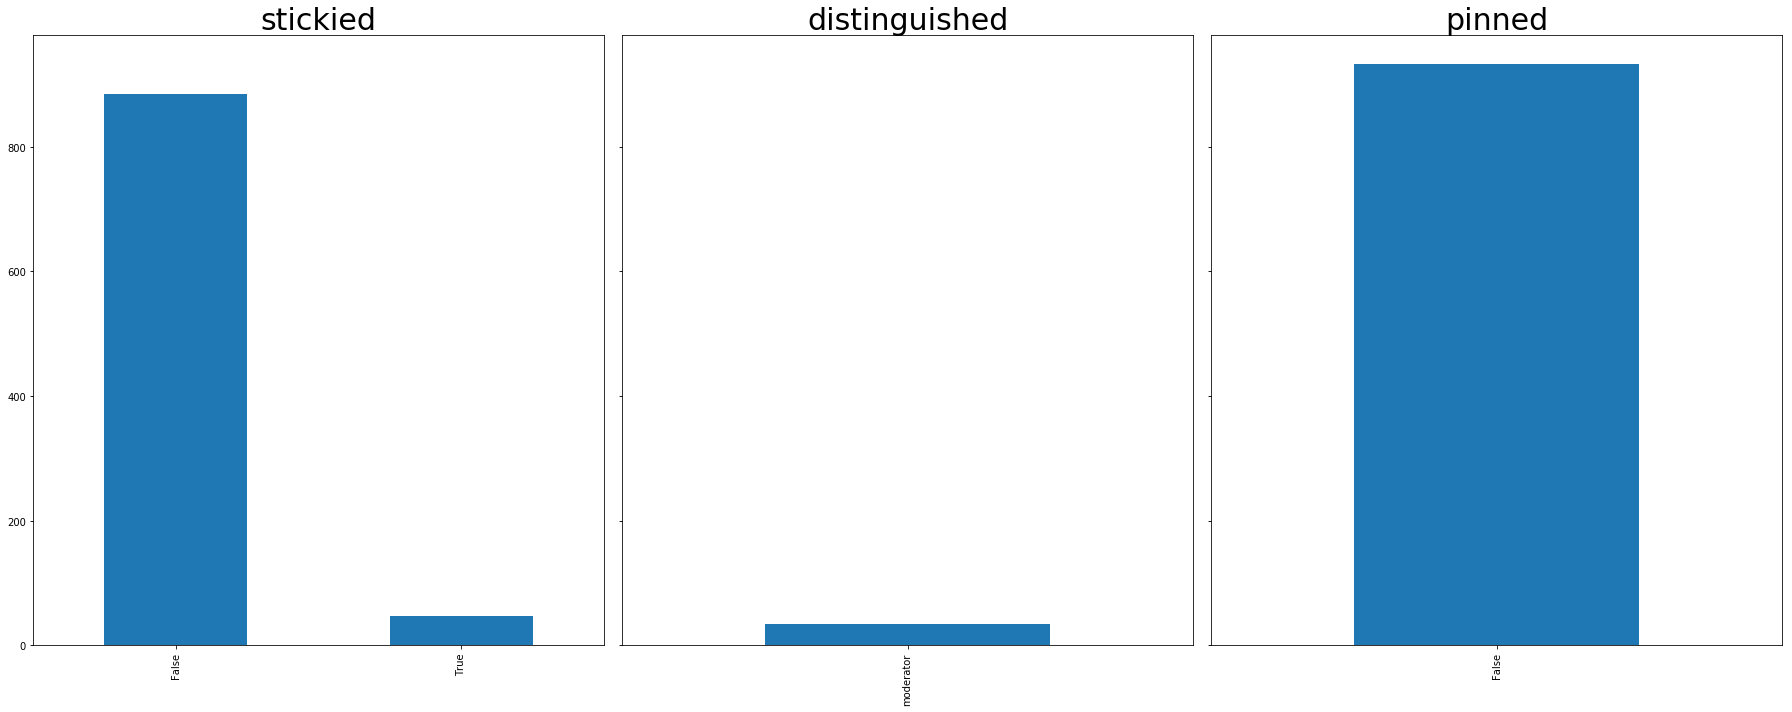

In [26]:
### Visualize
fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True)
fig.set_figheight(10)
fig.set_figwidth(25)

pd.DataFrame(df_top_posts.stickied.value_counts()).plot(kind='bar', legend=False, ax=axs[0])
axs[0].set_title('stickied', fontsize=30)
pd.DataFrame(df_top_posts.distinguished.value_counts()).plot(kind='bar', legend=False, ax=axs[1])
axs[1].set_title('distinguished', fontsize=30)
pd.DataFrame(df_top_posts.pinned.value_counts()).plot(kind='bar', legend=False, ax=axs[2])
axs[2].set_title('pinned', fontsize=30)


/homes/gws/taugust/miniconda3/envs/reddit/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


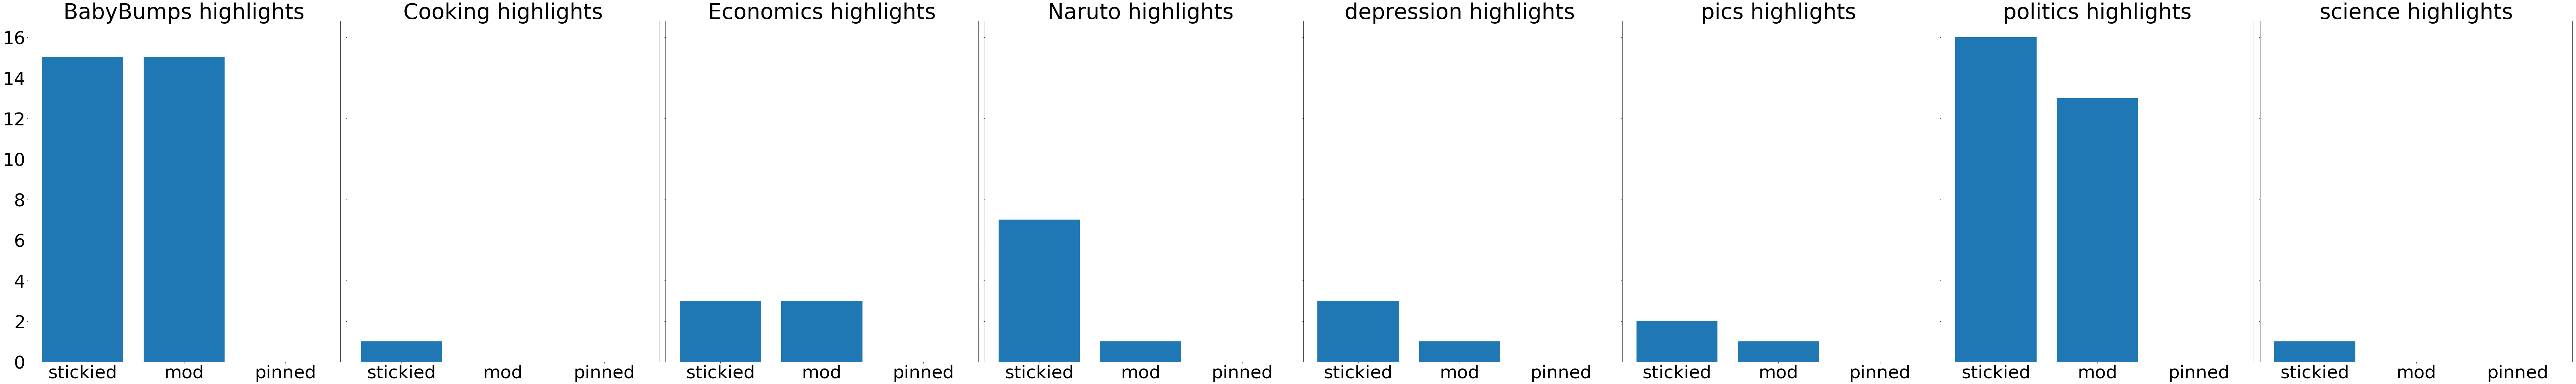

In [27]:
### see each subreddit how many 

sub_groups = df_top_posts.groupby(['subreddit_name'])
fig, axs = plt.subplots(1, len(sub_groups), sharey=True, tight_layout=True)
fig.set_figheight(15)
fig.set_figwidth(100)

for i, (sub,g) in enumerate(sub_groups):
    axs[i].set_title(sub + ' highlights', fontsize=60)
    num_stickied = g['stickied'].apply(lambda x: x == 'True').sum()
    num_mod = g['distinguished'].apply(lambda x: x == 'moderator').sum()
    num_pinned = g['pinned'].apply(lambda x: x == 'True').sum()
    axs[i].bar(x=['stickied', 'mod', 'pinned'], height=[num_stickied, num_mod, num_pinned])
    axs[i].tick_params(axis='both', which='major', labelsize=50)


In [21]:
import re
# removes https, following :'s, and urls
def remove_urls(x):
    url_regex = r'[(]*https?:\/\/.*[/n)]*'
    path_regex = 
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)

    
    
# Descriptions have an inordinate amount of *, [], (), and #, so removing them
def remove_special_chars(x):
    



SyntaxError: invalid syntax (<ipython-input-21-d04705d4188c>, line 4)